In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 
import functions

In [2]:
# explanation on the black line on the barplots 

# errorbar = string, (string, number) tuple, callable or None
# Name of errorbar method (either “ci”, “pi”, “se”, or “sd”), 
# or a tuple with a method name and a level parameter, or a function that maps from a vector to a (min, max) interval, 
# or None to hide errorbar. See the errorbar tutorial for more information.

# https://seaborn.pydata.org/tutorial/error_bars.html

# count dfs for the SL case, input: mean annual, daily 

In [3]:
'''
%%time


# langtang
# folder_path = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/4landcover_25percent/mustang_climate_cut'
folder_path = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_mean_annual

elevation = pd.read_csv('/Users/varyabazilova/Desktop/paper2/downscaling_simple/coordinates_and_elevation_with_labels_mustang.csv')[['cellnr2','band_data']] 
landcover = 'landcover4'
location = 'mustang'

column = 'dfs'
result_df = pd.DataFrame()


# Iterate over the files in the folders
for folder_name in os.listdir(folder_path):
    # skip all csvs and . files
    if folder_name.endswith('.csv'):
        continue
    if folder_name.startswith('.'):
        continue 
    
    file_path = os.path.join(folder_path, folder_name, 'Sediment.out') #create a path to file 
    
    if os.path.isfile(file_path): #check if its there 
        # read file 
        output_df = pd.read_csv(file_path)
        # count dfs per given time 
        output_df = functions.count_dfs_per_time(output_df, column, 'year')
        
        # take the COUNT column 
        name_column = output_df['count']
        # rename the columns 
        column_name = f'{column}_{folder_name}'
        result_df[column_name] = name_column
        result_df.columns = [col[-3:] for col in result_df.columns]


annaul_df_count = functions.add_elevation_to_df_count(result_df, elevation)


output = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_25percent/'
# annaul_df_count.to_csv(output + f'{location}_annual_df_count_annualmean_{landcover}.csv')
'''

"\n%%time\n\n\n# langtang\nfolder_path = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/4landcover_25percent/mustang_climate_cut'\nelevation = pd.read_csv('/Users/varyabazilova/Desktop/paper2/downscaling_simple/coordinates_and_elevation_with_labels_mustang.csv')[['cellnr2','band_data']] \nlandcover = 'landcover4'\nlocation = 'mustang'\n\ncolumn = 'dfs'\nresult_df = pd.DataFrame()\n\n\n# Iterate over the files in the folders\nfor folder_name in os.listdir(folder_path):\n    # skip all csvs and . files\n    if folder_name.endswith('.csv'):\n        continue\n    if folder_name.startswith('.'):\n        continue \n    \n    file_path = os.path.join(folder_path, folder_name, 'Sediment.out') #create a path to file \n    \n    if os.path.isfile(file_path): #check if its there \n        # read file \n        output_df = pd.read_csv(file_path)\n        # count dfs per given time \n        output_df = functions.count_dfs_per_time(output_df, column, 'year')\n        \n   

In [4]:
# annaul_df_count

# plot df count - langtang 

In [5]:
def prepare_dfcount_for_plot(dfcount):
    melted = pd.melt(dfcount, id_vars=['D'], var_name='elevation', value_name='dfs_count')
    melted['elevation'] = melted['elevation'].str.split('.').str[0].astype(float)
    melted['elevation_bin'] = melted.apply(functions.bin_elevation200, axis=1)
    melted = melted.sort_values('elevation_bin')
    # melted = melted.dropna(subset=['dfs_count'])
    return melted 


In [6]:
path = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_mean_annual/'

langtang1 = pd.read_csv(path + 'langtang_annual_df_count_annualmean_landcover1.csv', index_col = 0)
langtang2 = pd.read_csv(path + 'langtang_annual_df_count_annualmean_landcover2.csv', index_col = 0)
langtang3 = pd.read_csv(path + 'langtang_annual_df_count_annualmean_landcover3.csv', index_col = 0)
langtang4 = pd.read_csv(path + 'langtang_annual_df_count_annualmean_landcover4.csv', index_col = 0)

langtang1_melt = prepare_dfcount_for_plot(langtang1)
langtang2_melt = prepare_dfcount_for_plot(langtang2)
langtang3_melt = prepare_dfcount_for_plot(langtang3)
langtang4_melt = prepare_dfcount_for_plot(langtang4)


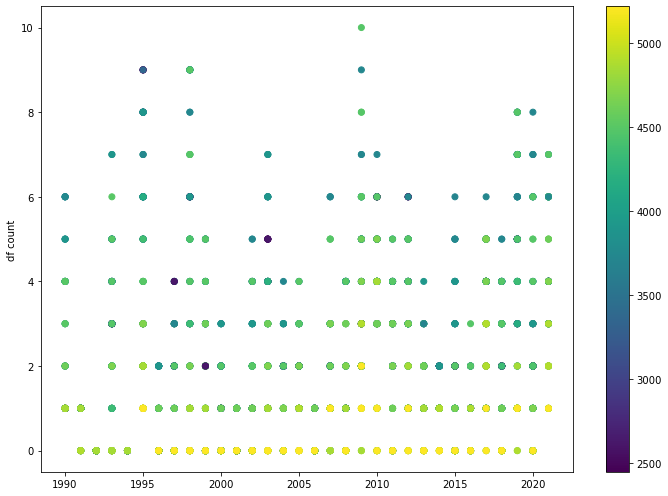

In [7]:
fig = plt.figure(figsize=(10, 7), layout = 'tight')

plt.scatter(x = langtang1_melt.D, y=langtang1_melt.dfs_count, c = langtang1_melt.elevation)
plt.scatter(x = langtang2_melt.D, y=langtang2_melt.dfs_count, c = langtang2_melt.elevation)
plt.scatter(x = langtang3_melt.D, y=langtang3_melt.dfs_count, c = langtang3_melt.elevation)
plt.scatter(x = langtang4_melt.D, y=langtang4_melt.dfs_count, c = langtang4_melt.elevation)
plt.ylabel('df count')
plt.colorbar()

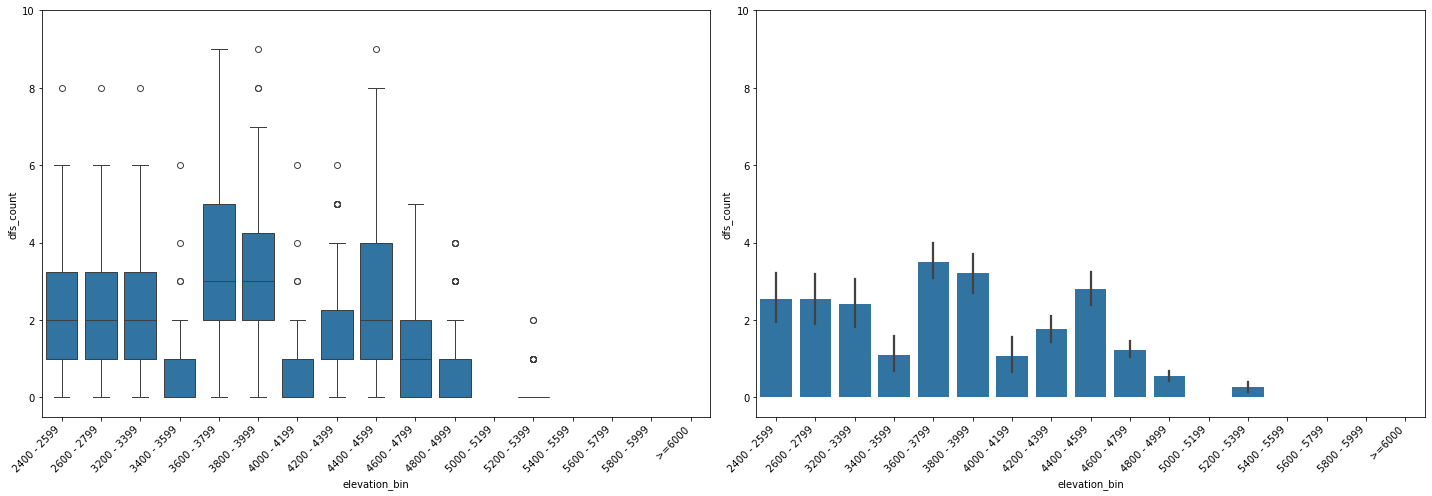

In [8]:

fig = plt.figure(figsize=(20, 7), layout = 'tight')

mosaic = fig.subplot_mosaic('''
                            ab
                            ''')

sns.boxplot(ax=mosaic['a'], x='elevation_bin', y='dfs_count', data=langtang1_melt)
sns.barplot(ax=mosaic['b'], x='elevation_bin', y='dfs_count', data=langtang1_melt, estimator="mean", errorbar=('ci', 95))

mosaic['a'].set_ylim(-0.5, 10)
mosaic['b'].set_ylim(-0.5, 10)

plt.setp(mosaic['a'].get_xticklabels(), rotation=45, ha="right")
plt.setp(mosaic['b'].get_xticklabels(), rotation=45, ha="right")

plt.show()

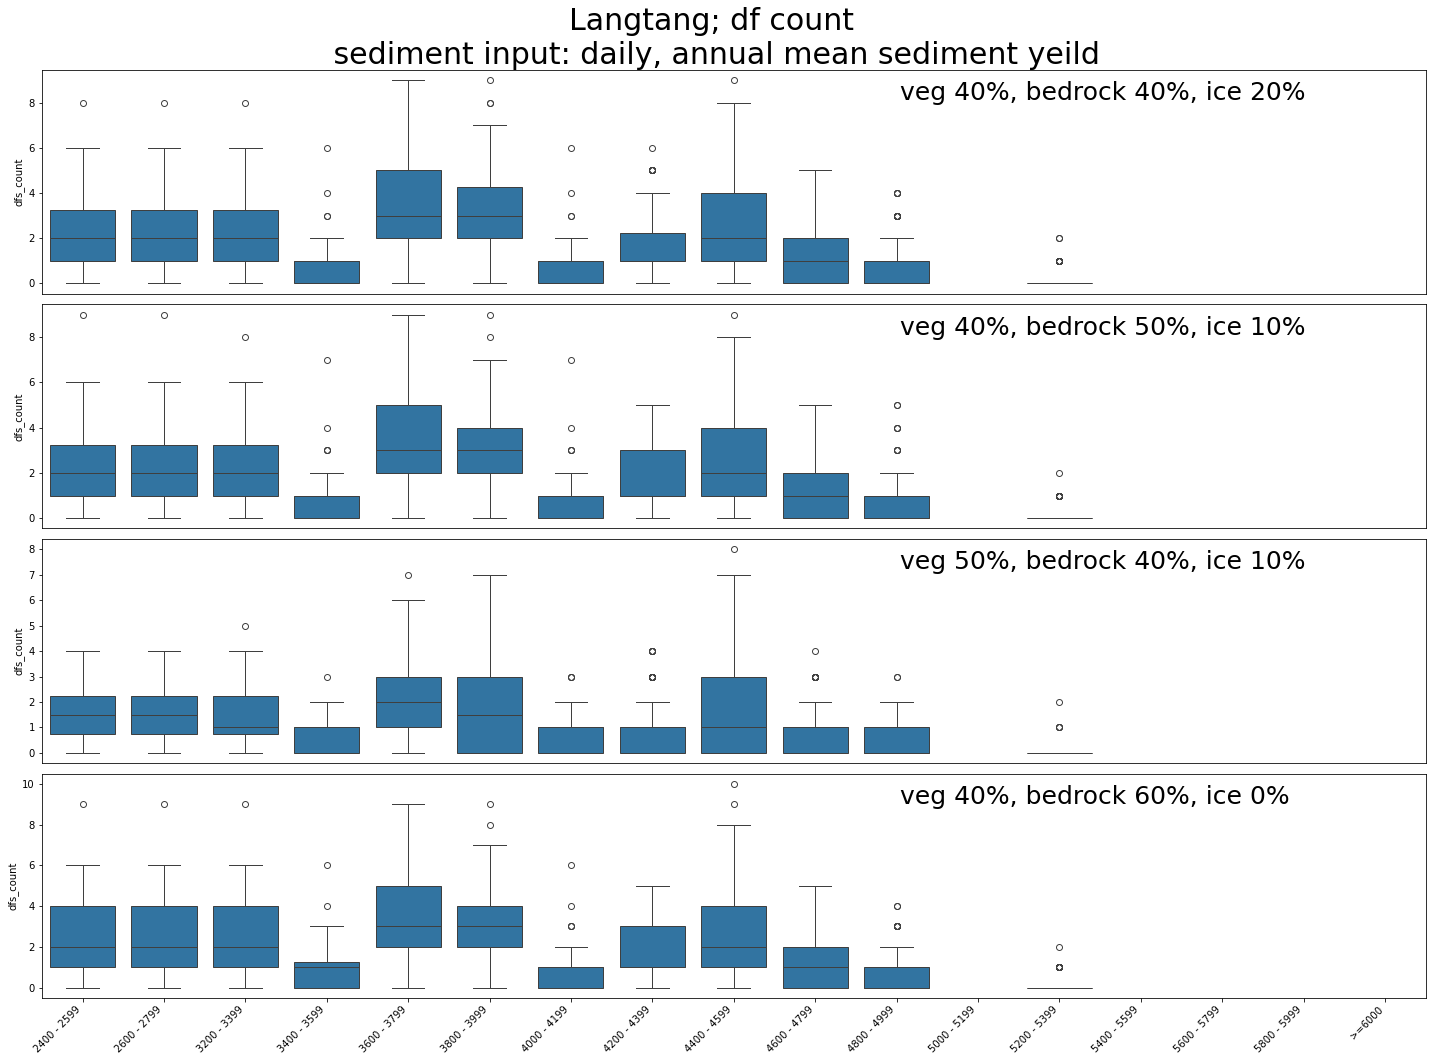

In [9]:
fig = plt.figure(figsize=(20, 15), layout = 'tight')
mosaic = fig.subplot_mosaic('''
                            aaa
                            bbb
                            ccc
                            ddd
                            ''')


sns.boxplot(ax = mosaic['a'], x='elevation_bin', y='dfs_count', data=langtang1_melt)#, palette = 'magma_r') 
sns.boxplot(ax = mosaic['b'], x='elevation_bin', y='dfs_count', data=langtang2_melt)#, palette = 'magma_r') 
sns.boxplot(ax = mosaic['c'], x='elevation_bin', y='dfs_count', data=langtang3_melt)#, palette = 'magma_r') 
sns.boxplot(ax = mosaic['d'], x='elevation_bin', y='dfs_count', data=langtang4_melt)#, palette = 'magma_r') 

# Adding text to the top-left corner of each subplot
mosaic['a'].text(0.62, 0.95, 'veg 40%, bedrock 40%, ice 20%', transform=mosaic['a'].transAxes, fontsize=25, verticalalignment='top')
mosaic['b'].text(0.62, 0.95, 'veg 40%, bedrock 50%, ice 10%', transform=mosaic['b'].transAxes, fontsize=25, verticalalignment='top')
mosaic['c'].text(0.62, 0.95, 'veg 50%, bedrock 40%, ice 10%', transform=mosaic['c'].transAxes, fontsize=25, verticalalignment='top')
mosaic['d'].text(0.62, 0.95, 'veg 40%, bedrock 60%, ice 0%',  transform=mosaic['d'].transAxes, fontsize=25, verticalalignment='top')

# Removing the x-axis label from all subplots
mosaic['a'].set(xlabel=None)
mosaic['b'].set(xlabel=None)
mosaic['c'].set(xlabel=None)
mosaic['d'].set(xlabel=None)

# Hide x-ticks for all subplots except 'd'
mosaic['a'].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mosaic['b'].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mosaic['c'].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.setp(mosaic['d'].get_xticklabels(), rotation=45, ha="right")


fig.suptitle('Langtang; df count \n sediment input: daily, annual mean sediment yeild ', fontsize=30)

plt.show()




## distribution per month 

# mustang 

In [10]:
path = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_mean_annual/'

mustang1 = pd.read_csv(path + 'mustang_annual_df_count_annualmean_landcover1.csv', index_col = 0)
mustang2 = pd.read_csv(path + 'mustang_annual_df_count_annualmean_landcover2.csv', index_col = 0)
mustang3 = pd.read_csv(path + 'mustang_annual_df_count_annualmean_landcover3.csv', index_col = 0)
mustang4 = pd.read_csv(path + 'mustang_annual_df_count_annualmean_landcover4.csv', index_col = 0)

mustang1_melt = prepare_dfcount_for_plot(mustang1)
mustang2_melt = prepare_dfcount_for_plot(mustang2)
mustang3_melt = prepare_dfcount_for_plot(mustang3)
mustang4_melt = prepare_dfcount_for_plot(mustang4)


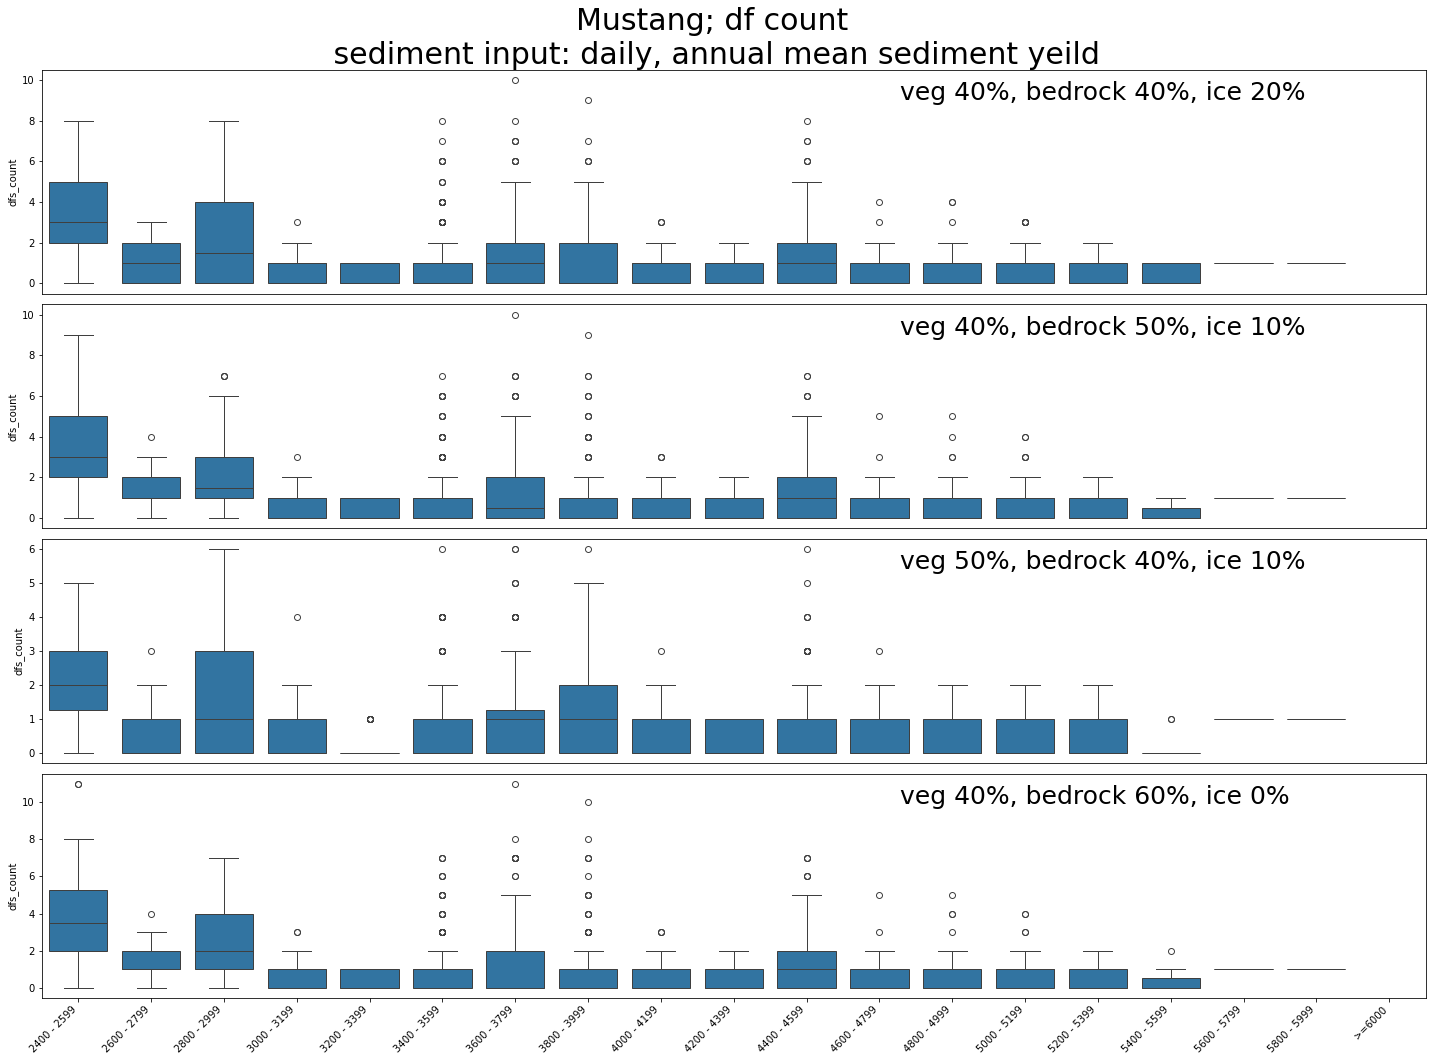

In [11]:
fig = plt.figure(figsize=(20, 15), layout = 'tight')
mosaic = fig.subplot_mosaic('''
                            aaa
                            bbb
                            ccc
                            ddd
                            ''')


sns.boxplot(ax = mosaic['a'], x='elevation_bin', y='dfs_count', data=mustang1_melt) 
sns.boxplot(ax = mosaic['b'], x='elevation_bin', y='dfs_count', data=mustang2_melt) 
sns.boxplot(ax = mosaic['c'], x='elevation_bin', y='dfs_count', data=mustang3_melt) 
sns.boxplot(ax = mosaic['d'], x='elevation_bin', y='dfs_count', data=mustang4_melt) 

# Adding text to the top-left corner of each subplot
mosaic['a'].text(0.62, 0.95, 'veg 40%, bedrock 40%, ice 20%', transform=mosaic['a'].transAxes, fontsize=25, verticalalignment='top')
mosaic['b'].text(0.62, 0.95, 'veg 40%, bedrock 50%, ice 10%', transform=mosaic['b'].transAxes, fontsize=25, verticalalignment='top')
mosaic['c'].text(0.62, 0.95, 'veg 50%, bedrock 40%, ice 10%', transform=mosaic['c'].transAxes, fontsize=25, verticalalignment='top')
mosaic['d'].text(0.62, 0.95, 'veg 40%, bedrock 60%, ice 0%',  transform=mosaic['d'].transAxes, fontsize=25, verticalalignment='top')

# Removing the x-axis label from all subplots
mosaic['a'].set(xlabel=None)
mosaic['b'].set(xlabel=None)
mosaic['c'].set(xlabel=None)
mosaic['d'].set(xlabel=None)

# Hide x-ticks for all subplots except 'd'
mosaic['a'].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mosaic['b'].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mosaic['c'].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.setp(mosaic['d'].get_xticklabels(), rotation=45, ha="right")


fig.suptitle('Mustang; df count \n sediment input: daily, annual mean sediment yeild ', fontsize=30)



plt.show()

# count dfs for the SL case, input: mean annual, once per year 

In [40]:
'''
%%time

landcover = 'landcover4'
location = 'mustang'

folder_path = f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/4landcover_mean/{location}_climate_cut'
elevation = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/downscaling_simple/coordinates_and_elevation_with_labels_{location}.csv')[['cellnr2','band_data']] 


column = 'dfs'
result_df = pd.DataFrame()


# Iterate over the files in the folders
for folder_name in os.listdir(folder_path):
    # skip all csvs and . files
    if folder_name.endswith('.csv'):
        continue
    if folder_name.startswith('.'):
        continue 
    
    file_path = os.path.join(folder_path, folder_name, 'Sediment.out') #create a path to file 
    
    if os.path.isfile(file_path): #check if its there 
        # read file 
        output_df = pd.read_csv(file_path)
        # count dfs per given time 
        output_df = functions.count_dfs_per_time(output_df, column, 'year')
        
        # take the COUNT column 
        name_column = output_df['count']
        # rename the columns 
        column_name = f'{column}_{folder_name}'
        result_df[column_name] = name_column
        result_df.columns = [col[-3:] for col in result_df.columns]


annaul_df_count = functions.add_elevation_to_df_count(result_df, elevation)


output = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_mean_annual/'
annaul_df_count.to_csv(output + f'{location}_annual_df_count_annualmean_{landcover}.csv')
'''

<timed exec>:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


default land cover. monthly data: same
CPU times: user 44.6 s, sys: 1.94 s, total: 46.5 s
Wall time: 47.2 s


In [41]:
path = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_mean_annual/'

langtang1 = pd.read_csv(path + 'langtang_annual_df_count_annualmean_landcover1.csv', index_col = 0)
langtang2 = pd.read_csv(path + 'langtang_annual_df_count_annualmean_landcover2.csv', index_col = 0)
langtang3 = pd.read_csv(path + 'langtang_annual_df_count_annualmean_landcover3.csv', index_col = 0)
langtang4 = pd.read_csv(path + 'langtang_annual_df_count_annualmean_landcover4.csv', index_col = 0)

langtang1_melt = prepare_dfcount_for_plot(langtang1)
langtang2_melt = prepare_dfcount_for_plot(langtang2)
langtang3_melt = prepare_dfcount_for_plot(langtang3)
langtang4_melt = prepare_dfcount_for_plot(langtang4)


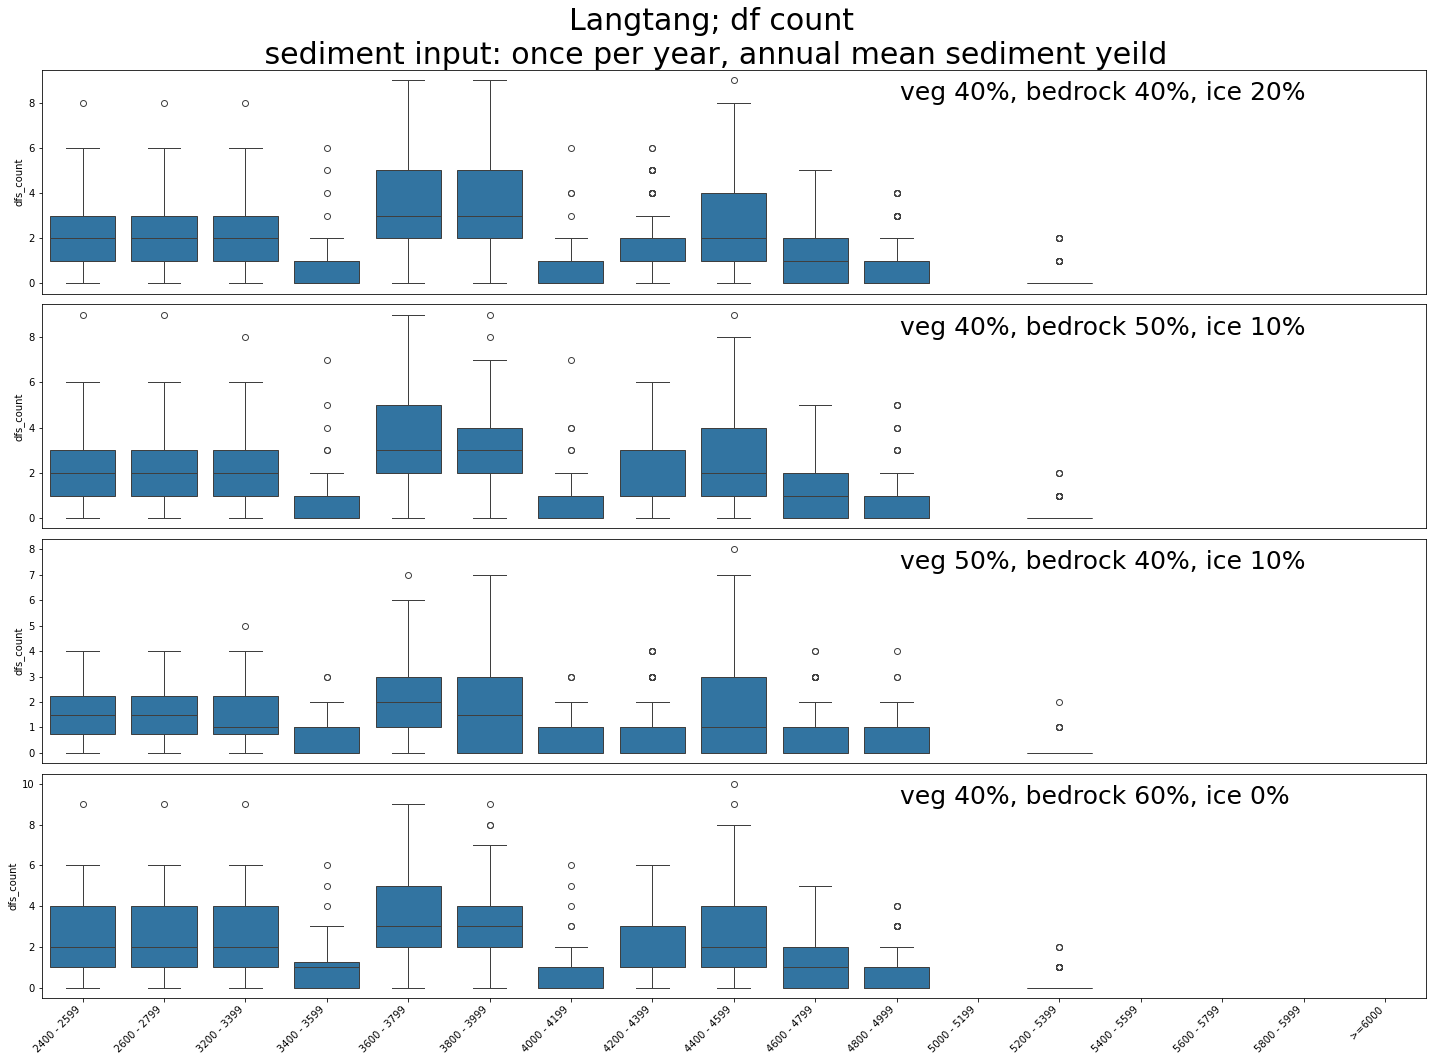

In [42]:
fig = plt.figure(figsize=(20, 15), layout = 'tight')
mosaic = fig.subplot_mosaic('''
                            aaa
                            bbb
                            ccc
                            ddd
                            ''')


sns.boxplot(ax = mosaic['a'], x='elevation_bin', y='dfs_count', data=langtang1_melt) 
sns.boxplot(ax = mosaic['b'], x='elevation_bin', y='dfs_count', data=langtang2_melt) 
sns.boxplot(ax = mosaic['c'], x='elevation_bin', y='dfs_count', data=langtang3_melt) 
sns.boxplot(ax = mosaic['d'], x='elevation_bin', y='dfs_count', data=langtang4_melt) 

# Adding text to the top-left corner of each subplot
mosaic['a'].text(0.62, 0.95, 'veg 40%, bedrock 40%, ice 20%', transform=mosaic['a'].transAxes, fontsize=25, verticalalignment='top')
mosaic['b'].text(0.62, 0.95, 'veg 40%, bedrock 50%, ice 10%', transform=mosaic['b'].transAxes, fontsize=25, verticalalignment='top')
mosaic['c'].text(0.62, 0.95, 'veg 50%, bedrock 40%, ice 10%', transform=mosaic['c'].transAxes, fontsize=25, verticalalignment='top')
mosaic['d'].text(0.62, 0.95, 'veg 40%, bedrock 60%, ice 0%',  transform=mosaic['d'].transAxes, fontsize=25, verticalalignment='top')

# Removing the x-axis label from all subplots
mosaic['a'].set(xlabel=None)
mosaic['b'].set(xlabel=None)
mosaic['c'].set(xlabel=None)
mosaic['d'].set(xlabel=None)

# Hide x-ticks for all subplots except 'd'
mosaic['a'].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mosaic['b'].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mosaic['c'].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.setp(mosaic['d'].get_xticklabels(), rotation=45, ha="right")


fig.suptitle('Langtang; df count \n sediment input: once per year, annual mean sediment yeild ', fontsize=30)



plt.show()

In [43]:
path = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_mean_annual/'

mustang1 = pd.read_csv(path + 'mustang_annual_df_count_annualmean_landcover1.csv', index_col = 0)
mustang2 = pd.read_csv(path + 'mustang_annual_df_count_annualmean_landcover2.csv', index_col = 0)
mustang3 = pd.read_csv(path + 'mustang_annual_df_count_annualmean_landcover3.csv', index_col = 0)
mustang4 = pd.read_csv(path + 'mustang_annual_df_count_annualmean_landcover4.csv', index_col = 0)

mustang1_melt = prepare_dfcount_for_plot(mustang1)
mustang2_melt = prepare_dfcount_for_plot(mustang2)
mustang3_melt = prepare_dfcount_for_plot(mustang3)
mustang4_melt = prepare_dfcount_for_plot(mustang4)


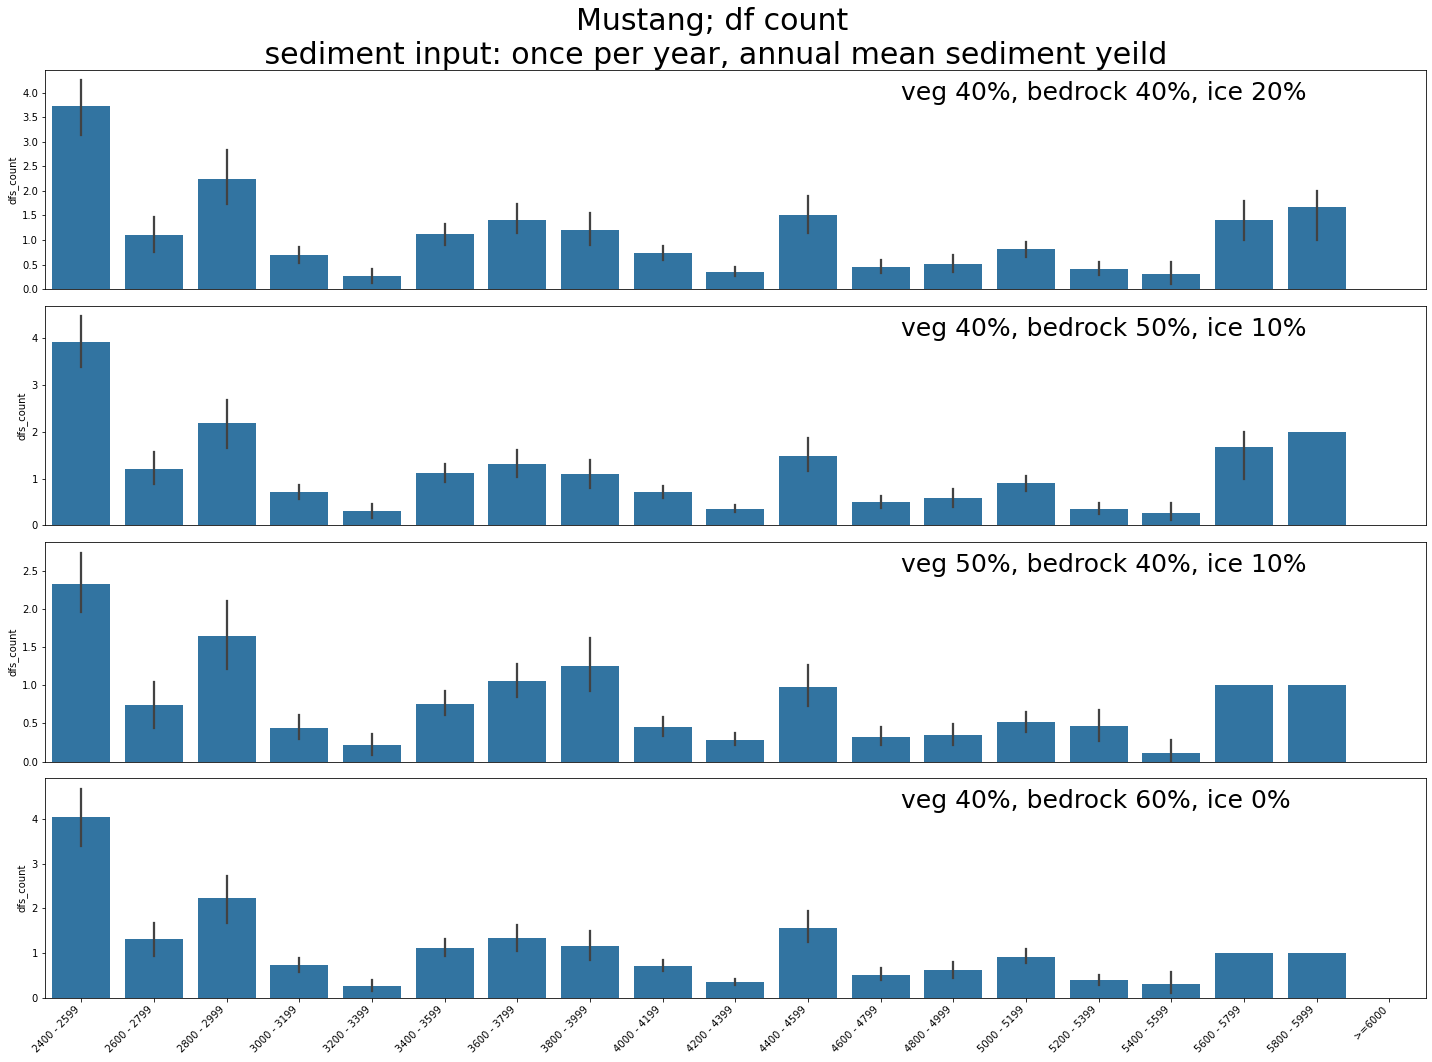

In [45]:
fig = plt.figure(figsize=(20, 15), layout = 'tight')
mosaic = fig.subplot_mosaic('''
                            aaa
                            bbb
                            ccc
                            ddd
                            ''')


sns.barplot(ax = mosaic['a'], x='elevation_bin', y='dfs_count', data=mustang1_melt) 
sns.barplot(ax = mosaic['b'], x='elevation_bin', y='dfs_count', data=mustang2_melt) 
sns.barplot(ax = mosaic['c'], x='elevation_bin', y='dfs_count', data=mustang3_melt) 
sns.barplot(ax = mosaic['d'], x='elevation_bin', y='dfs_count', data=mustang4_melt) 

# Adding text to the top-left corner of each subplot
mosaic['a'].text(0.62, 0.95, 'veg 40%, bedrock 40%, ice 20%', transform=mosaic['a'].transAxes, fontsize=25, verticalalignment='top')
mosaic['b'].text(0.62, 0.95, 'veg 40%, bedrock 50%, ice 10%', transform=mosaic['b'].transAxes, fontsize=25, verticalalignment='top')
mosaic['c'].text(0.62, 0.95, 'veg 50%, bedrock 40%, ice 10%', transform=mosaic['c'].transAxes, fontsize=25, verticalalignment='top')
mosaic['d'].text(0.62, 0.95, 'veg 40%, bedrock 60%, ice 0%',  transform=mosaic['d'].transAxes, fontsize=25, verticalalignment='top')

# Removing the x-axis label from all subplots
mosaic['a'].set(xlabel=None)
mosaic['b'].set(xlabel=None)
mosaic['c'].set(xlabel=None)
mosaic['d'].set(xlabel=None)

# Hide x-ticks for all subplots except 'd'
mosaic['a'].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mosaic['b'].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
mosaic['c'].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.setp(mosaic['d'].get_xticklabels(), rotation=45, ha="right")


fig.suptitle('Mustang; df count \n sediment input: once per year, annual mean sediment yeild ', fontsize=30)



plt.show()